In [249]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [250]:
#Importing dataset
df=pd.read_csv("Alcohol_Sales.csv")
df.head()

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


In [251]:
# Changing the column names
df.columns=["Date","Sales"]
df.head()

,Date,Sales
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


In [252]:
# Coonverting to date time format
df['Date']=pd.to_datetime(df['Date'])
df.tail()

,Date,Sales
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504
324,2019-01-01,10718


In [253]:
# Set Date as an index
df.set_index('Date', inplace= True)
df.tail()


,Sales
Date,
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174
2018-12-01,15504
2019-01-01,10718


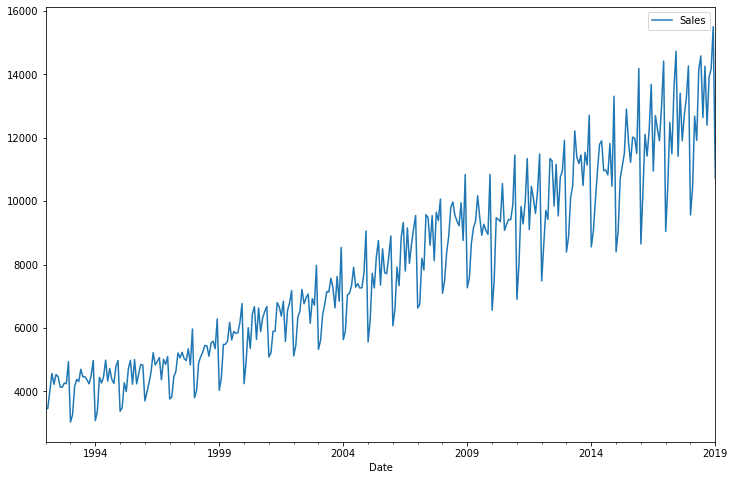

In [254]:
#Ploting the data
df.plot(figsize=(12,8))

In [255]:
#Simple Moving Average over a period of 5
df['SMA_5']=df.Sales.rolling(5,min_periods=1).mean()

#Simple Moving average over a period of 10
df['SMA_10']=df.Sales.rolling(10,min_periods=1).mean()

#Simple moving average over a period of 20
df['SMA_20']=df.Sales.rolling(20,min_periods=1).mean()
df.head()



,Sales,SMA_5,SMA_10,SMA_20
Date,,,,
1992-01-01,3459,3459.000000,3459.000000,3459.000000
1992-02-01,3458,3458.500000,3458.500000,3458.500000
1992-03-01,4002,3639.666667,3639.666667,3639.666667
1992-04-01,4564,3870.750000,3870.750000,3870.750000
1992-05-01,4221,3940.800000,3940.800000,3940.800000


In [256]:
# Calculating error for Sales and the moving average for 10 periods
df['Error_10']=df['Sales']-df['SMA_5']
df.tail()

,Sales,SMA_5,SMA_10,SMA_20,Error_10
Date,,,,,
2018-09-01,12396,13602.8,12686.0,12612.80,-1206.8
2018-10-01,13914,13558.0,12650.9,12785.90,356.0
2018-11-01,14174,13476.2,13111.9,12870.55,697.8
2018-12-01,15504,14049.0,13620.8,13071.20,1455.0
2019-01-01,10718,13341.2,13424.3,12929.85,-2623.2


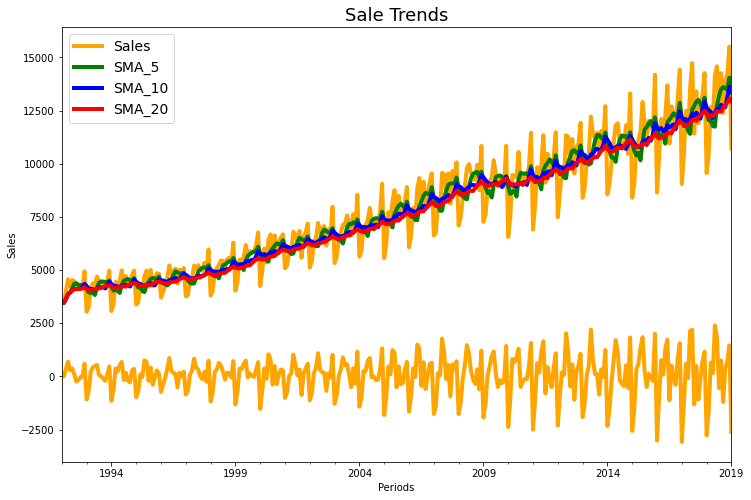

In [257]:
#Colors that are used in our plot
colors=['orange','green','blue','red']

#Line plot for sales
df.plot(color=colors,linewidth=4,figsize=(12,8))

#Labels
plt.legend(labels=['Sales','SMA_5','SMA_10','SMA_20'],fontsize=14)
plt.title("Sale Trends",fontsize=18)
plt.xlabel('Periods')
plt.ylabel("Sales")
plt.show()

In [258]:
# KPI Calculations
MAE=df['Error_10'].abs().mean()
print("Mean Average Error",round(MAE,2))
RMSE=np.sqrt((df['Error_10']**2).mean())
print("Root Mean Square Error",round(RMSE,2))
MSE=(df['Error_10']**2).mean()
print('Mean Square Error',round(MSE,2))

Mean Average Error 676.33
Root Mean Square Error 911.31
Mean Square Error 830493.66


Linear Regression

In [259]:
import seaborn as sns
import scipy.stats as sp
import numpy as np

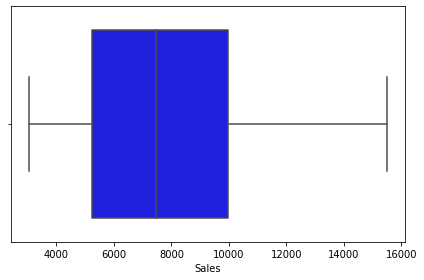

In [260]:
# here we are analysing the outliers
plot1 = sns.boxplot(df['Sales'], color = 'blue')
plt.tight_layout()

As we can see that there is no outliers in the dataset

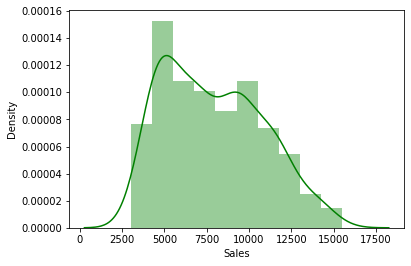

In [261]:
sns.distplot(df['Sales'], kde = True, color = 'green')

Our data is not stationary, as we did not get a bell shape graph

In [262]:
# Calculating threshold to make the data stationary
max_threshold = df['Sales'].quantile(0.95)
max_threshold

12865.400000000001

In [263]:
# Saving the threshold data into df1
df1 = df[df['Sales']<max_threshold]
df1

,Sales,SMA_5,SMA_10,SMA_20,Error_10
Date,,,,,
1992-01-01,3459,3459.000000,3459.000000,3459.000000,0.000000
1992-02-01,3458,3458.500000,3458.500000,3458.500000,-0.500000
1992-03-01,4002,3639.666667,3639.666667,3639.666667,362.333333
1992-04-01,4564,3870.750000,3870.750000,3870.750000,693.250000
1992-05-01,4221,3940.800000,3940.800000,3940.800000,280.200000
...,...,...,...,...,...
2018-03-01,12683,12037.600000,12435.400000,12284.000000,645.400000
2018-04-01,11919,11769.200000,12154.300000,12244.950000,149.800000
2018-07-01,12640,13192.600000,12617.900000,12453.350000,-552.600000


In [264]:
# Calculating R,S and P
Y = np.array(df1['Sales'].dropna().values,dtype=float)
x = np.array(pd.to_datetime(df1['Sales'].dropna()).index.values,dtype=float)
slope, intercept, r_value, p_value, std_err = sp.linregress(x,Y)
xf = np.linspace(min(x),max(x),100)
xf1 = xf.copy()
xf1 = pd.to_datetime(xf1)
yf = (slope*xf)+intercept
print('R = ',r_value,'\t','P = ', p_value, ' \n ', 'S = ', std_err )

R =  0.9395190928579757 	 P =  1.9517408516921484e-144  
  S =  2.1536095172641163e-16


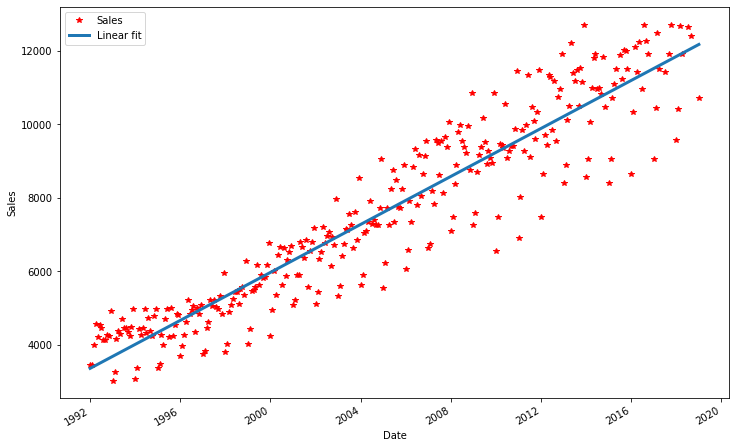

In [265]:
#Linear Line
f , ax = plt.subplots(1,1)

df1['Sales'].dropna().plot(ax=ax,marker = '*',ls = '', color = 'red',figsize=(12,8))

ax.plot(xf1,yf,label='Linear fit', lw = 3)

plt.ylabel('Sales')
ax.legend();
plt.show()


In [266]:
dataset= pd.read_csv('Alcohol_Sales.csv', index_col='DATE', parse_dates=True)
dataset = dataset.rename(columns={'S4248SM144NCEN': 'Sales'})

In [267]:
dataset.index.freq='MS'

In [268]:
train=dataset.iloc[:301]
test=dataset.iloc[301:]

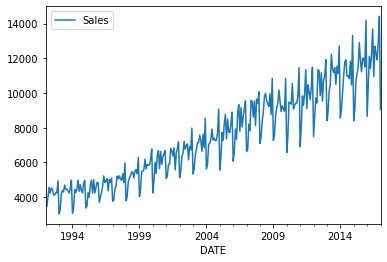

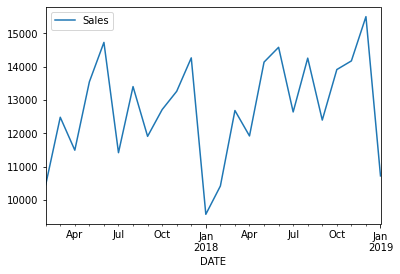

In [269]:
train.plot()
test.plot()

In [270]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
tes=ExponentialSmoothing(train['Sales'], trend='add', seasonal='add',seasonal_periods=12)
model= tes.fit()


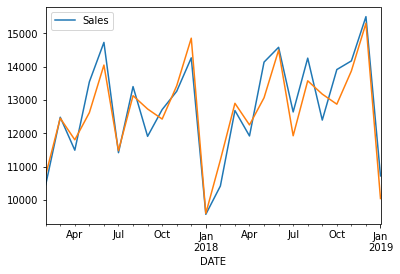

In [271]:
test.plot()
model.forecast(24).plot()
forecast=model.forecast(24)

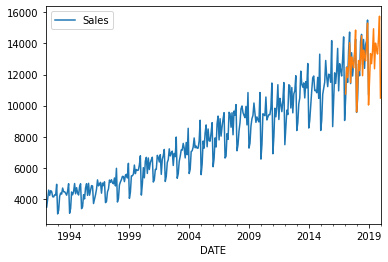

In [272]:
dataset.plot()
model.forecast(36).plot()


In [273]:
# Calculate MAE and RMSE
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
#Error= forecast-test['Sales']
mae = metrics.mean_absolute_error(test['Sales'], forecast)
mse = metrics.mean_squared_error(test['Sales'], forecast)
rmse = np.sqrt(mse)

print("MAE:",round(mae,2)) 
print("RMSE:",round(rmse,2))

MAE: 473.09
RMSE: 573.78


In [274]:
df = pd.read_csv("Alcohol_Sales.csv")
df = df.rename(columns={"S4248SM144NCEN": "Sales"})
df

,DATE,Sales
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221
...,...,...
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504


In [275]:
df['Month'] = pd.to_datetime(df['DATE'],infer_datetime_format=True)
df = df.set_index(['Month'])
df.drop('DATE',inplace=True,axis=1)

ARIMA : statistical model used to analyze and forcasting time series data.
It is composed of
1.  p (number of lag observation of the model ) which is AR (Autoregression)
2.  q (size of moving average)for MA (Moving average)
3.  d (number of times the observations difference)for I (Integrated)

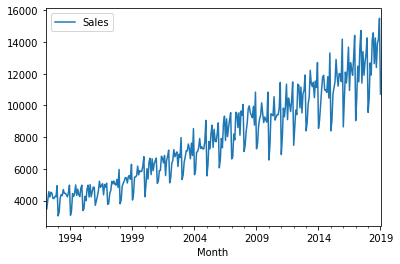

In [276]:
# Plot the time series using the DataFrame's .plot() method.
df.plot()
plt.show()

We have plotted the data as time series with sales along y axis and years along the y axis for acohol sales.
We can see that the trend is increasing as the years are increasing.

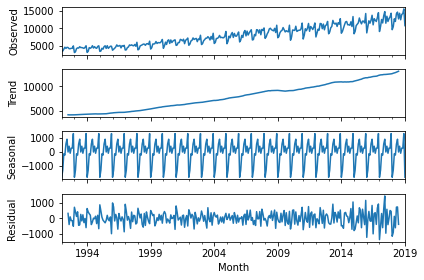

In [277]:
# Import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(df['Sales'], 
                            freq=12)

# Plot decomposition
decomp.plot()
plt.show()

Stationarity means that the distribution of data does not change with time and stationarity depedns on the p value we use would want to achieve greater stationarity which would be our goal

In [278]:
## checking for stationarity

from statsmodels.tsa.stattools import adfuller
# Run Dicky-Fuller test
result = adfuller(df['Sales'])
# Print test statistic
print(result)

(2.0374047259137025, 0.9987196267088919, 14, 310, {'1%': -3.451621854687657, '5%': -2.870908950689806, '10%': -2.571761810613944}, 4458.6002223980295)


We want the p value to be as close to 0 hence we would apply the integrated part of the ARIMA i.e. we would the the difference of the data which is done below.

In [279]:
# Make it stationary Take the first difference of the data
df_diff = df.diff().dropna()
# Run Dicky-Fuller test
result = adfuller(df_diff['Sales'])
# Print test statistic
print(result)

(-4.365959619246069, 0.0003408284921169802, 13, 310, {'1%': -3.451621854687657, '5%': -2.870908950689806, '10%': -2.571761810613944}, 4447.435024118939)


Now the p value is close to zero which is around 0.00034

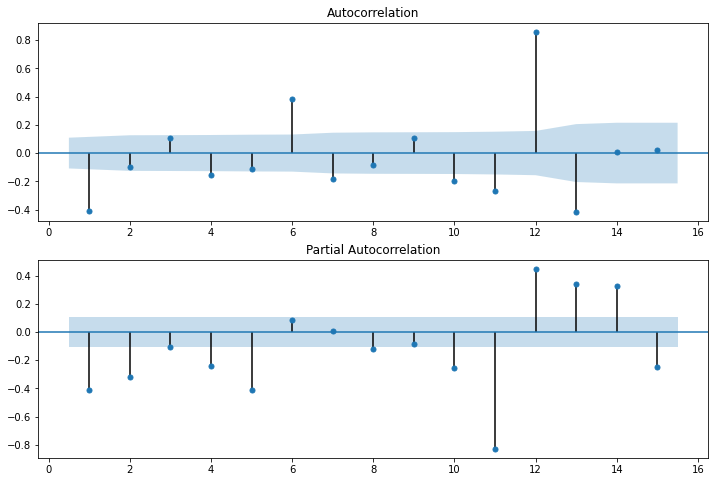

In [280]:
# Import ACF and PCF functions
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF on ax1
plot_acf(df_diff, lags=15, zero=False, ax=ax1)

# Plot the PACF of on ax2
plot_pacf(df_diff, lags=15, zero=False, ax=ax2)

plt.show()

From the pcf and acf we can see that we have the up and downs and nothing is falling off because acf and pcf both is showing infinite number of values i.e. infinite tail offs so ARIMA is model we need to proceed with.

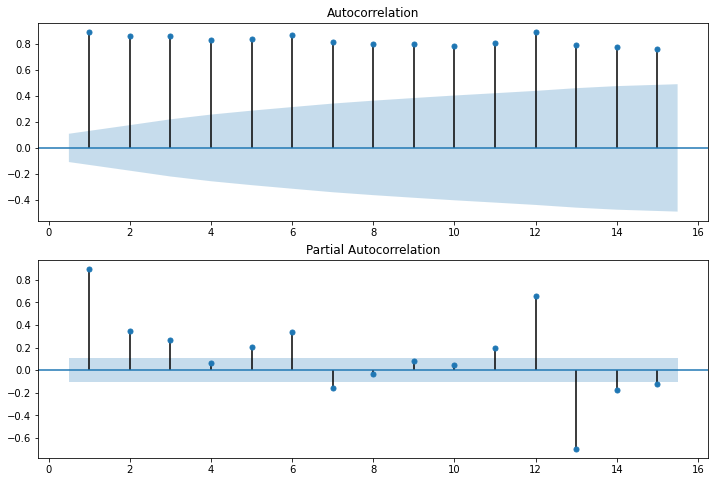

In [281]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF on ax1
plot_acf(df, lags=15, zero=False, ax=ax1)

# Plot the PACF of on ax2
plot_pacf(df, lags=15, zero=False, ax=ax2)

plt.show()

#### Generate Prediction using your own values p= 2 and q=2

#### Generating One Step Ahead Predictions in sample


In [282]:
# Import the SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(df, order=(2,1,2))
results = model.fit()

# Print fit summary
print(results.summary())

                           Statespace Model Results                           
Dep. Variable:                  Sales   No. Observations:                  325
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -2691.533
Date:                Mon, 01 Mar 2021   AIC                           5393.066
Time:                        03:56:45   BIC                           5411.970
Sample:                    01-01-1992   HQIC                          5400.611
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0422      0.049     21.255      0.000       0.946       1.138
ar.L2         -0.3361      0.059     -5.686      0.000      -0.452      -0.220
ma.L1         -1.9308      0.067    -28.746      0.0

In [283]:
# Generate predictions for the last 12 periods in sample
one_step_forecast = results.get_prediction(start=-12)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Sales']
upper_limits = confidence_intervals.loc[:,'upper Sales']

# Print best estimate predictions
print(mean_forecast)

2018-02-01    11999.099433
2018-03-01    12983.081442
2018-04-01    13764.641320
2018-05-01    13616.711263
2018-06-01    13869.637889
2018-07-01    13445.119605
2018-08-01    12724.812795
2018-09-01    12844.366732
2018-10-01    12299.069176
2018-11-01    12565.633875
2018-12-01    12441.940661
2019-01-01    12503.549485
Freq: MS, dtype: float64


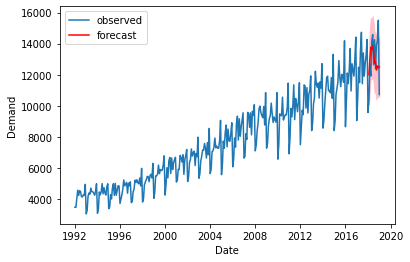

In [284]:
# plot the  data
plt.plot(df.index, df, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

#### Generate Dynamic Predictions

In [285]:
# Generate predictions
one_step_forecast = results.get_prediction(start=-12, dynamic = True)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Sales']
upper_limits = confidence_intervals.loc[:,'upper Sales']

# Print best estimate predictions
print(mean_forecast)

2018-02-01    11999.099433
2018-03-01    13167.453961
2018-04-01    13566.722681
2018-05-01    13590.171696
2018-06-01    13480.416147
2018-07-01    13358.142730
2018-08-01    13267.592999
2018-09-01    13214.314400
2018-10-01    13189.219037
2018-11-01    13180.970590
2018-12-01    13180.808299
2019-01-01    13183.411475
Freq: MS, dtype: float64


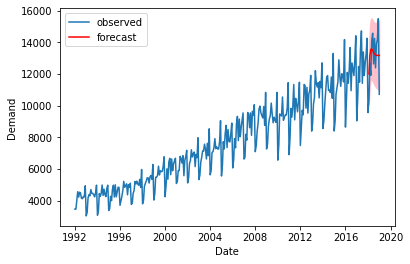

In [286]:
# plot the  data
plt.plot(df.index, df, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

### Out of the Sample Predictions (12 periods ahead)

In [287]:
forecast = results.get_forecast(steps =12)
mean_forecast= forecast.predicted_mean
confidence_intervals= forecast.conf_int()
confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Sales']
upper_limits = confidence_intervals.loc[:,'upper Sales']

# Print best estimate predictions
print(mean_forecast)

2019-02-01    11765.190616
2019-03-01    12690.578944
2019-04-01    13303.096850
2019-05-01    13630.465232
2019-06-01    13765.794499
2019-07-01    13796.811433
2019-08-01    13783.654183
2019-09-01    13759.516243
2019-10-01    13738.780785
2019-11-01    13725.282179
2019-12-01    13718.182566
2020-01-01    13715.319943
Freq: MS, dtype: float64


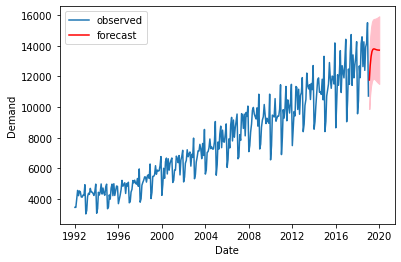

In [288]:
# plot the  data
plt.plot(df.index, df, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

#### Use the grid search method to calculate the parameter p and q

In [289]:
# Create empty list to store search results
order_aic_bic=[]
# Loop over p values from 0-2
for p in range(3):
# Loop over q values from 0-2
    for q in range(3):
        try:
            # Create and fit ARIMA(p,d,q) model
            model = SARIMAX(df, order=(p,0,q), trend='c')
            results = model.fit()
            # Append order and results tuple
            order_aic_bic.append((p,q,results.aic, results.bic))
        except:
            print(p, q, None, None)

In [290]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

   p  q          AIC          BIC
8  2  2  5437.144927  5459.847878
5  1  2  5448.929142  5467.848267
4  1  1  5449.102670  5464.237971
7  2  1  5451.961774  5470.880900
6  2  0  5536.015637  5551.150938
3  1  0  5586.154553  5597.506029
2  0  2  5790.789439  5805.924740
1  0  1  5880.732973  5892.084449
0  0  0  6110.601811  6118.169461
   p  q          AIC          BIC
8  2  2  5437.144927  5459.847878
4  1  1  5449.102670  5464.237971
5  1  2  5448.929142  5467.848267
7  2  1  5451.961774  5470.880900
6  2  0  5536.015637  5551.150938
3  1  0  5586.154553  5597.506029
2  0  2  5790.789439  5805.924740
1  0  1  5880.732973  5892.084449
0  0  0  6110.601811  6118.169461


From the above values for AIC and BIC and we need to have the lower number for both hence we can see that for comparing we use BIC which deals with false negative while AIC would be used to select models with AIc dealing with false positive.
Hence on comparing we can select form the following 
   
   p      q        AIC          BIC

   1      1        5449          546

   1      2        5448          546

therefore use p=1 and q=2


In [291]:
# Instantiate the model
arma = SARIMAX(df, order=(1,1,2))

In [292]:
results = arma.fit()
print(results.summary())

                           Statespace Model Results                           
Dep. Variable:                  Sales   No. Observations:                  325
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -2710.167
Date:                Mon, 01 Mar 2021   AIC                           5428.334
Time:                        03:56:49   BIC                           5443.457
Sample:                    01-01-1992   HQIC                          5434.370
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3983      0.705     -0.565      0.572      -1.781       0.984
ma.L1         -0.3832      0.686     -0.559      0.576      -1.727       0.960
ma.L2         -0.4274      0.579     -0.738      0.4

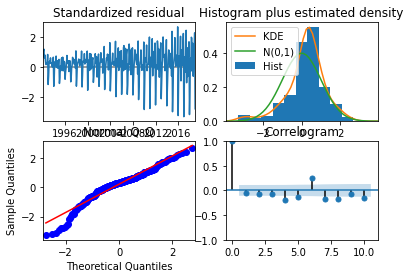

In [293]:
# Create the 4 diagostics plots
results.plot_diagnostics()
plt.show()

We can see that it is more stationary.
The moving average is the histogram.
The third graph is the auto regressive part
While the forth graph depicts the auto correlation and partial correlation

#### Generate one step forecast

In [294]:
# Generate predictions
one_step_forecast = results.get_prediction(start=-12)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Sales']
upper_limits = confidence_intervals.loc[:,'upper Sales']

# Print best estimate predictions
print(mean_forecast)

2018-02-01    11946.446492
2018-03-01    12068.508575
2018-04-01    12198.703884
2018-05-01    12067.856071
2018-06-01    12580.317652
2018-07-01    12753.386375
2018-08-01    12601.375521
2018-09-01    13026.877627
2018-10-01    12671.381742
2018-11-01    13102.785879
2018-12-01    13128.765585
2019-01-01    13606.072415
Freq: MS, dtype: float64


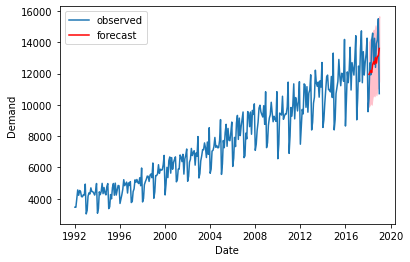

In [295]:
# plot the  data
plt.plot(df.index, df, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

From the graph we can see that forcast is better than previous however to make ie better we would be using Dynamic prediction where in the insample lag value is used for prediction i.e when demands are available while an outsample forecasting is used when demands are unavailable.

#### Generate Dynamic Predictions

In [296]:
# Generate predictions
one_step_forecast = results.get_prediction(start=-12, dynamic = True)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Sales']
upper_limits = confidence_intervals.loc[:,'upper Sales']

# Print best estimate predictions
print(mean_forecast)

2018-02-01    11946.446492
2018-03-01    12403.035311
2018-04-01    12221.166761
2018-05-01    12293.608678
2018-06-01    12264.753599
2018-07-01    12276.247160
2018-08-01    12271.669043
2018-09-01    12273.492599
2018-10-01    12272.766240
2018-11-01    12273.055563
2018-12-01    12272.940320
2019-01-01    12272.986224
Freq: MS, dtype: float64


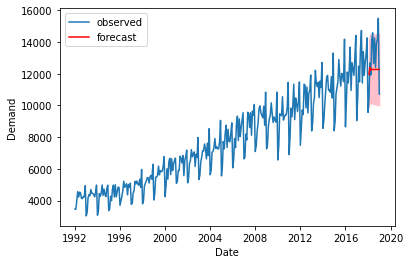

In [297]:
# plot the  data
plt.plot(df.index, df, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

#### Out of the Sample Predictions

In [298]:
forecast = results.get_forecast(steps =12)
mean_forecast= forecast.predicted_mean
confidence_intervals= forecast.conf_int()
confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Sales']
upper_limits = confidence_intervals.loc[:,'upper Sales']

# Print best estimate predictions
print(mean_forecast)

2019-02-01    12715.932880
2019-03-01    13154.576855
2019-04-01    12979.856098
2019-05-01    13049.450905
2019-06-01    13021.729888
2019-07-01    13032.771729
2019-08-01    13028.373541
2019-09-01    13030.125428
2019-10-01    13029.427616
2019-11-01    13029.705569
2019-12-01    13029.594854
2020-01-01    13029.638954
Freq: MS, dtype: float64


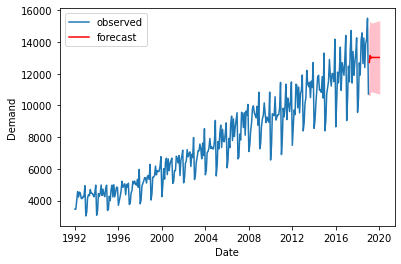

In [299]:
# plot the  data
plt.plot(df.index, df, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

In out of sample forecast we are using +12 to forecast without demand into the future hence using the dynamic forecasting to predict the future.